In [1]:
#import default libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [4]:
#import data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
combine = [train, test]
#df = train.append(test)


In [ ]:
df.info()

*** Features to explore:Sex,SibSp,Pclass,Parch,Age**


In [ ]:
#explore categorical categories:

In [5]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [6]:
train[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [5]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [6]:
train[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


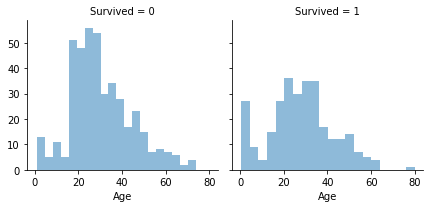

In [7]:
#explore numerical category Age
#grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')
grid = sns.FacetGrid(train, col='Survived')
grid.map(plt.hist, 'Age', alpha=0.5, bins=20)
grid.add_legend();

In [7]:
train = train.drop(['Ticket', 'Cabin'], axis=1)
test = test.drop(['Ticket', 'Cabin'], axis=1)
#df = df.drop(['Ticket', 'Cabin'], axis=1)

combine = [train, test]


In [8]:
#exploring titles
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

#df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [9]:
#Seting common titles
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    
#df['Title'] = df['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
#	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
#
#df['Title'] = df['Title'].replace('Mlle', 'Miss')
#df['Title'] = df['Title'].replace('Ms', 'Miss')
#df['Title'] = df['Title'].replace('Mme', 'Mrs')

In [10]:
train['Title']

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886    Rare
887    Miss
888    Miss
889      Mr
890      Mr
Name: Title, Length: 891, dtype: object

In [12]:
#Study title feature
train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [13]:
#discretization of title
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)


#df['Title'] = df['Title'].map(title_mapping)
#df['Title'] = df['Title'].fillna(0)


In [14]:
train = train.drop(['Name', 'PassengerId'], axis=1)
test = test.drop(['Name'], axis=1)
#df = df.drop(['Name', 'PassengerId'], axis=1)
combine = [train, test]
train.shape, test.shape

((891, 9), (418, 9))

In [15]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

#df['Sex'] = df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [16]:
train['Age'].isna().sum()


177

In [17]:
train['Embarked'].isna().sum()

2

In [18]:
#filling null ages with median
for dataset in combine:
    dataset['Age'].fillna(dataset['Age'].median(),inplace=True)
    dataset['Age']=dataset['Age'].astype(int)
    
#df['Age'].fillna(df['Age'].median(),inplace=True)

In [19]:
#Studyin ageBand distribuition
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.344762
2,"(32.0, 48.0]",0.403226
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


***new features***

In [20]:
# Discretization of age 
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [21]:
#Dropping ageBand feature
train = train.drop(['AgeBand'], axis=1)
combine = [train, test]
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [22]:
# Creating feature family size
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

#df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
train[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [23]:
#creating feature isAlone to check if it will be good for model
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [24]:
#Droping others features in favor of isAlone
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine = [train, test]

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [25]:
# Create artificial category age*class
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass

train.loc[:, ['Age*Class', 'Age', 'Pclass']].head(10)

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3
5,3,1,3
6,3,3,1
7,0,0,3
8,3,1,3
9,0,0,2


*** new features ***

In [26]:
#filling null Embarked with most common plataform 'S'
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

#df['Embarked'] = df['Embarked'].fillna('S')

In [27]:
#Study of Embarked Feature
train[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [28]:
#Discretization of Embarked
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

#df['Embarked'] = df['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [29]:
#Casting Fare
for dataset in combine:
    dataset['Fare'] = dataset['Fare'].fillna(dataset['Fare'].median())
    dataset['Fare'] = dataset['Fare'].astype(float)
    
#df['Fare'] = df['Fare'].fillna(df['Fare'].median())    
#df['Fare'] = df['Fare'].astype(float)

train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


*** new feature Fare discretization ***

In [30]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [31]:
train['FareBand'] = pd.qcut(train['Fare'], 4)

In [32]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6
5,0,3,0,1,1,2,1,1,3
6,0,1,0,3,3,0,1,1,3
7,0,3,0,0,2,0,4,0,0
8,1,3,1,1,1,0,3,0,3
9,1,2,1,0,2,1,3,0,0


***im***

___________________________________________________________________-

Modelos classicos sem tunning

In [38]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [39]:
X_train = train.drop("Survived", axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [ ]:
X_test.info()

In [40]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.36

In [41]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissionLogReg.csv', index=False)

In [42]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svm = round(svc.score(X_train, Y_train) * 100, 2)
acc_svm

82.38

In [43]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissionSVM.csv', index=False)

In [44]:
#knn
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

81.93

In [45]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissionKNN.csv', index=False)

In [46]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

84.29

In [47]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissionDT.csv', index=False)

In [48]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

84.29

In [49]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissionRandomForest.csv', index=False)

In [36]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


_______________________________________________________________________________________________________________

Inicio do modelo utilizando essemble e bayes optimization 

In [35]:
from sklearn.model_selection import train_test_split

In [38]:
Xtrain, Xtest, ytrain, ytest = train_test_split(train.drop('Survived', axis =1),train['Survived'], train_size=0.5)

In [39]:
Xtrain.shape, Xtest.shape, ytrain.shape, ytest.shape

((445, 8), (446, 8), (445,), (446,))

In [41]:
!pip install lightgbm

In [42]:
from lightgbm import LGBMClassifier

In [43]:
mdl = LGBMClassifier(random_state=0)
mdl.fit(Xtrain, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [44]:
from sklearn.metrics import roc_auc_score
p = mdl.predict_proba(Xtest)[:, 1]

In [46]:
roc_auc_score(ytest, p)

0.8515476470211265

In [52]:
from skopt import dummy_minimize

In [53]:
def treinar_modelo(params):
    learning_rate = params[0]
    num_leaves = params[1]
    min_child_samples = params[2]
    subsample = params[3]
    colsample_bytree = params[4]
    
    print(params, '\n')
    
    mdl = LGBMClassifier(learning_rate=learning_rate, num_leaves=num_leaves, min_child_samples=min_child_samples,
                        subsample=subsample, colsample_bytree=colsample_bytree, random_state=0, subsample_freq=1, 
                         n_estimators=100)
    mdl.fit(Xtrain, ytrain)
    
    p = mdl.predict_proba(Xtest)[:,1]
    
    return -roc_auc_score(ytest, p)

space = [(1e-3, 1e-1, 'log-uniform'), #learning rate
         (2, 128), # num_leaves
         (1, 100), # min_child_samples
         (0.05, 1.0), # subsample
         (0.1, 1.0)] # colsample bytree

resultado = dummy_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=30)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 74, 10, 0.3372159440002478, 0.23208030173540176] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0511
Function value obtained: -0.8581
Current minimum: -0.8581
Iteration No: 2 started. Evaluating function at random point.
[0.001529949829431263, 78, 72, 0.3782826906908954, 0.457090726807603] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0250
Function value obtained: -0.8282
Current minimum: -0.8581
Iteration No: 3 started. Evaluating function at random point.
[0.01195730942971637, 128, 19, 0.5483207515942279, 0.49910760440160107] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0440
Function value obtained: -0.8563
Current minimum: -0.8581
Iteration No: 4 started. Evaluating function at random point.
[0.0028784217488024557, 16, 51, 0.9182639233502714, 0.5114843271882895] 

Iteration No: 4 ended. Evaluation done at random point.
Time

In [54]:
resultado.x

[0.021930881089764206, 73, 4, 0.6880713925510277, 0.47060909107214777]

In [55]:
#auc = 0.8718 [0.021930881089764206, 73, 4, 0.6880713925510277, 0.47060909107214777]

In [56]:
from skopt import gp_minimize

In [57]:
resultados_gp = gp_minimize(treinar_modelo, space, random_state=1, verbose=1, n_calls=200, n_random_starts=10)

Iteration No: 1 started. Evaluating function at random point.
[0.09871192514273254, 120, 14, 0.9990884895579377, 0.3124800792567785] 

Iteration No: 1 ended. Evaluation done at random point.
Time taken: 0.0590
Function value obtained: -0.8561
Current minimum: -0.8561
Iteration No: 2 started. Evaluating function at random point.
[0.006210998932353835, 51, 67, 0.9387621172657304, 0.8616798250174156] 

Iteration No: 2 ended. Evaluation done at random point.
Time taken: 0.0380
Function value obtained: -0.8551
Current minimum: -0.8561
Iteration No: 3 started. Evaluating function at random point.
[0.004232013397179603, 68, 45, 0.2680983530433343, 0.5809725180523154] 

Iteration No: 3 ended. Evaluation done at random point.
Time taken: 0.0350
Function value obtained: -0.8520
Current minimum: -0.8561
Iteration No: 4 started. Evaluating function at random point.
[0.0672858974212934, 60, 44, 0.9421713999524447, 0.8005503127028804] 

Iteration No: 4 ended. Evaluation done at random point.
Time ta

Iteration No: 32 ended. Search finished for the next optimal point.
Time taken: 0.6500
Function value obtained: -0.5000
Current minimum: -0.8644
Iteration No: 33 started. Searching for the next optimal point.
[0.0022099251641118692, 2, 77, 0.5428523608083252, 1.0] 

Iteration No: 33 ended. Search finished for the next optimal point.
Time taken: 0.6200
Function value obtained: -0.7960
Current minimum: -0.8644
Iteration No: 34 started. Searching for the next optimal point.
[0.001, 128, 17, 0.3134791339894351, 1.0] 

Iteration No: 34 ended. Search finished for the next optimal point.
Time taken: 0.5480
Function value obtained: -0.8467
Current minimum: -0.8644
Iteration No: 35 started. Searching for the next optimal point.
[0.001, 9, 36, 0.47579729022017186, 0.2718572624730773] 

Iteration No: 35 ended. Search finished for the next optimal point.
Time taken: 0.6261
Function value obtained: -0.8469
Current minimum: -0.8644
Iteration No: 36 started. Searching for the next optimal point.
[0.0

Iteration No: 64 ended. Search finished for the next optimal point.
Time taken: 0.8601
Function value obtained: -0.8538
Current minimum: -0.8731
Iteration No: 65 started. Searching for the next optimal point.
[0.08324826535514863, 60, 100, 0.2691540700205733, 0.8406173242911147] 

Iteration No: 65 ended. Search finished for the next optimal point.
Time taken: 0.9281
Function value obtained: -0.5000
Current minimum: -0.8731
Iteration No: 66 started. Searching for the next optimal point.
[0.1, 2, 30, 0.9809444205119385, 0.1] 

Iteration No: 66 ended. Search finished for the next optimal point.
Time taken: 0.9781
Function value obtained: -0.8562
Current minimum: -0.8731
Iteration No: 67 started. Searching for the next optimal point.
[0.07407645616440788, 2, 49, 0.7063137936328359, 0.1] 

Iteration No: 67 ended. Search finished for the next optimal point.
Time taken: 1.0916
Function value obtained: -0.8538
Current minimum: -0.8731
Iteration No: 68 started. Searching for the next optimal po

Iteration No: 96 ended. Search finished for the next optimal point.
Time taken: 1.5171
Function value obtained: -0.8512
Current minimum: -0.8731
Iteration No: 97 started. Searching for the next optimal point.
[0.1, 2, 25, 0.6313540452474199, 0.1] 

Iteration No: 97 ended. Search finished for the next optimal point.
Time taken: 1.5231
Function value obtained: -0.8544
Current minimum: -0.8731
Iteration No: 98 started. Searching for the next optimal point.
[0.1, 2, 79, 0.6460494695185819, 0.18513556795807062] 

Iteration No: 98 ended. Search finished for the next optimal point.
Time taken: 1.4331
Function value obtained: -0.8527
Current minimum: -0.8731
Iteration No: 99 started. Searching for the next optimal point.
[0.0022172398005489325, 2, 1, 0.7618691890878843, 0.1] 

Iteration No: 99 ended. Search finished for the next optimal point.
Time taken: 1.5591
Function value obtained: -0.8483
Current minimum: -0.8731
Iteration No: 100 started. Searching for the next optimal point.
[0.1, 37, 

Iteration No: 129 ended. Search finished for the next optimal point.
Time taken: 2.5752
Function value obtained: -0.8561
Current minimum: -0.8731
Iteration No: 130 started. Searching for the next optimal point.
[0.001, 128, 22, 0.7321324758680207, 0.1] 

Iteration No: 130 ended. Search finished for the next optimal point.
Time taken: 2.5312
Function value obtained: -0.8456
Current minimum: -0.8731
Iteration No: 131 started. Searching for the next optimal point.
[0.001, 128, 45, 0.828941120461733, 0.1] 

Iteration No: 131 ended. Search finished for the next optimal point.
Time taken: 2.3682
Function value obtained: -0.8479
Current minimum: -0.8731
Iteration No: 132 started. Searching for the next optimal point.
[0.001, 128, 54, 1.0, 0.1] 

Iteration No: 132 ended. Search finished for the next optimal point.
Time taken: 2.2902
Function value obtained: -0.8470
Current minimum: -0.8731
Iteration No: 133 started. Searching for the next optimal point.
[0.001, 128, 48, 0.9046652137938871, 0.1

Iteration No: 162 ended. Search finished for the next optimal point.
Time taken: 3.3813
Function value obtained: -0.8529
Current minimum: -0.8731
Iteration No: 163 started. Searching for the next optimal point.
[0.001, 2, 20, 0.7956253667096947, 0.1] 

Iteration No: 163 ended. Search finished for the next optimal point.
Time taken: 3.6431
Function value obtained: -0.8488
Current minimum: -0.8731
Iteration No: 164 started. Searching for the next optimal point.
[0.1, 128, 66, 0.6167417801066163, 0.1] 

Iteration No: 164 ended. Search finished for the next optimal point.
Time taken: 3.5259
Function value obtained: -0.8506
Current minimum: -0.8731
Iteration No: 165 started. Searching for the next optimal point.
[0.001, 128, 100, 0.8380981591876066, 0.8816338875377321] 

Iteration No: 165 ended. Search finished for the next optimal point.
Time taken: 3.6628
Function value obtained: -0.8206
Current minimum: -0.8731
Iteration No: 166 started. Searching for the next optimal point.
[0.1, 128, 1

Iteration No: 195 ended. Search finished for the next optimal point.
Time taken: 5.1058
Function value obtained: -0.8506
Current minimum: -0.8731
Iteration No: 196 started. Searching for the next optimal point.
[0.001, 128, 61, 0.8643623764225601, 1.0] 

Iteration No: 196 ended. Search finished for the next optimal point.
Time taken: 4.9049
Function value obtained: -0.8591
Current minimum: -0.8731
Iteration No: 197 started. Searching for the next optimal point.
[0.1, 63, 27, 0.6363019694689993, 0.1] 

Iteration No: 197 ended. Search finished for the next optimal point.
Time taken: 5.0863
Function value obtained: -0.8621
Current minimum: -0.8731
Iteration No: 198 started. Searching for the next optimal point.
[0.001, 69, 26, 0.26259783651528723, 0.1] 

Iteration No: 198 ended. Search finished for the next optimal point.
Time taken: 4.6449
Function value obtained: -0.8495
Current minimum: -0.8731
Iteration No: 199 started. Searching for the next optimal point.
[0.1, 128, 18, 0.5217661193

In [58]:
resultados_gp.x

[0.05517749401500165, 80, 1, 0.8493782664489173, 0.3230731501583218]

In [59]:
mdl_best = LGBMClassifier(learning_rate=0.055, num_leaves=80, min_child_samples=1,
                        subsample=0.849, colsample_bytree=0.323, random_state=0, subsample_freq=1, 
                         n_estimators=100)

In [60]:
mdl_best.fit(Xtrain, ytrain)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=0.323,
               importance_type='split', learning_rate=0.055, max_depth=-1,
               min_child_samples=1, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
               random_state=0, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=0.849, subsample_for_bin=200000, subsample_freq=1)

In [62]:
X_test  = test.drop("PassengerId", axis=1).copy()

In [63]:
Y_pred = mdl_best.predict(X_test)

In [64]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('submissionLGMC.csv', index=False)

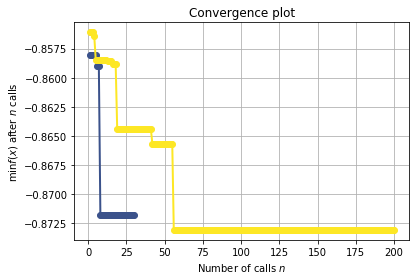

In [65]:
from skopt.plots import plot_convergence
plot_convergence(resultado, resultados_gp)